# Loan Data for Prosper - Exploration Analysis
### by Karthick Mahalingam



## Preliminary Wrangling

The dataset used for this project contains the list of loans and it has about 81 fields which describe the loan. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sb

%matplotlib inline

### Loading Dataset and describing properties.

#### Gathering Data.

* Initial dataset was downloaded from here: __[Loan Data](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv)__ 

* For US region, we need to identify which US State belongs to which US Region i.e. Northeast, West, etc., . This data was downloaded from here: __[US Region Data](https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv)__

* Loan Listing Category was derived from the data dictionary: __[Loan Data Dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)__ 

In [2]:
# Loading Loan Data 
df = pd.read_csv('./prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


There are 81 fields or variables for each loan. Detailed Data dictionary can be found here: __[Loan Data Dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)__ . Below is the list of details of the fields used for analysis.

In [3]:
#List of interesting columns.
interesting_cols = ['ListingKey', 'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus', \
                    'BorrowerAPR', 'ProsperRating (numeric)', 'ProsperRating (Alpha)','ProsperScore', \
                    'ListingCategory (numeric)', 'BorrowerState', 'Occupation','CreditScoreRangeLower', \
                    'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount']
df_filtered = df[interesting_cols]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
ListingKey                   113937 non-null object
ListingCreationDate          113937 non-null object
CreditGrade                  28953 non-null object
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerAPR                  113912 non-null float64
ProsperRating (numeric)      84853 non-null float64
ProsperRating (Alpha)        84853 non-null object
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null int64
BorrowerState                108422 non-null object
Occupation                   110349 non-null object
CreditScoreRangeLower        113346 non-null float64
DebtToIncomeRatio            105383 non-null float64
StatedMonthlyIncome          113937 non-null float64
LoanOriginalAmount           113937 non-null int64
dtypes: float64(6), int64(3), object(7)
memory usage: 13.9

## Data Description

| Field Name | Description |
| --- | --- |
| ListingKey | Unique key for each listing, same value as the 'key' used in the listing object in the API. |
| ListingCreationDate | The date the listing was created. |
| CreditGrade | The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings. |
| Term | The length of the loan expressed in months. |
| LoanStatus | The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket. |
| BorrowerAPR | The Borrower's Annual Percentage Rate (APR) for the loan. |
| ProperRating (numeric) | Gaussian |
| ProsperRating (Alpha) | The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009. |
| ProsperScore | A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009. |
| ListingCategory (numeric) | The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans |
| BorrowerState | The two letter abbreviation of the state of the address of the borrower at the time the Listing was created. |
| Occupation | The Occupation selected by the Borrower at the time they created the listing. |
| CreditScoreRangeLower | The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency. |
| DebtToIncomeRatio | The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%). |
| StatedMonthlyIncome | The monthly income the borrower stated at the time the listing was created. |
| LoanOriginalAmount | The origination amount of the loan. |

#### Loading US State and Region Data.

In [4]:
df_us_region = pd.read_csv('./state_abbr.csv')
df_us_region.head()

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific


#### Data Description for US Region Data.

| Field Name | Description |
| --- | --- |
| State | Full Name of the US State. |
| State Code | Two Letter Abbrevation for the US State |
| Region | Name of the US Region. |
| Division | Name of the US Division |


#### Loading Listing Category Data 

In [5]:
category_key = np.arange(0,21)
category_description = ['Not Available','Debt Consolidation','Home Improvement','Business','Personal Loan','Student Use','Auto','Other','Baby&Adoption','Boat','Cosmetic Procedure','Engagement Ring','Green Loans','Household Expenses','Large Purchases','Medical/Dental','Motorcycle','RV','Taxes','Vacation','Wedding Loans']
listing_data = {'ListingCategoryKey': category_key, 'ListingCategoryDescription':  category_description}
df_listing_category = pd.DataFrame(listing_data);
df_listing_category.head()

,ListingCategoryKey,ListingCategoryDescription
0,0,Not Available
1,1,Debt Consolidation
2,2,Home Improvement
3,3,Business
4,4,Personal Loan


#### Data Description for Loan Listing Category

| Field Name | Description |
| --- | --- |
| ListingCategoryKey | Numeric Value of the Loan Listing Category |
| ListingCategoryDescription | Description of the loan listing |

In [6]:
# Merge original dataset with US region dataset to make it tidy..
df_filtered = df_filtered.merge(df_us_region, how='inner', left_on='BorrowerState', right_on='State Code')
# Merge original dataset with Listing Category dataset to make it tidy..
df_filtered = df_filtered.merge(df_listing_category, how='inner', left_on='ListingCategory (numeric)', \
                                right_on='ListingCategoryKey')
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108422 entries, 0 to 108421
Data columns (total 22 columns):
ListingKey                    108422 non-null object
ListingCreationDate           108422 non-null object
CreditGrade                   23438 non-null object
Term                          108422 non-null int64
LoanStatus                    108422 non-null object
BorrowerAPR                   108422 non-null float64
ProsperRating (numeric)       84853 non-null float64
ProsperRating (Alpha)         84853 non-null object
ProsperScore                  84853 non-null float64
ListingCategory (numeric)     108422 non-null int64
BorrowerState                 108422 non-null object
Occupation                    106221 non-null object
CreditScoreRangeLower         108422 non-null float64
DebtToIncomeRatio             99940 non-null float64
StatedMonthlyIncome           108422 non-null float64
LoanOriginalAmount            108422 non-null int64
State                         108422 non-nu

In [7]:
#Remove un-necessary columns.
unnecessary_col_names = ['ListingCategory (numeric)', 'State Code', 'Division', 'ListingCategoryKey']
df_filtered.drop(columns=unnecessary_col_names, inplace=True)
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108422 entries, 0 to 108421
Data columns (total 18 columns):
ListingKey                    108422 non-null object
ListingCreationDate           108422 non-null object
CreditGrade                   23438 non-null object
Term                          108422 non-null int64
LoanStatus                    108422 non-null object
BorrowerAPR                   108422 non-null float64
ProsperRating (numeric)       84853 non-null float64
ProsperRating (Alpha)         84853 non-null object
ProsperScore                  84853 non-null float64
BorrowerState                 108422 non-null object
Occupation                    106221 non-null object
CreditScoreRangeLower         108422 non-null float64
DebtToIncomeRatio             99940 non-null float64
StatedMonthlyIncome           108422 non-null float64
LoanOriginalAmount            108422 non-null int64
State                         108422 non-null object
Region                        108422 non-n

In [8]:
#Converting 'ListingCreationDate' datatype from string to datetime.
df_filtered['ListingCreationDate'] =  pd.to_datetime(df_filtered['ListingCreationDate'])

In [9]:
# Renaming column names for consistency.
rename_col_names = { 'ProsperRating (numeric)': 'ProsperRatingNumeric', \
                    'ProsperRating (Alpha)': 'ProsperRatingAlpha' , 'CreditScoreRangeLower': 'CreditScore' } 
df_filtered.rename(index=str, columns=rename_col_names, inplace=True)
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108422 entries, 0 to 108421
Data columns (total 18 columns):
ListingKey                    108422 non-null object
ListingCreationDate           108422 non-null datetime64[ns]
CreditGrade                   23438 non-null object
Term                          108422 non-null int64
LoanStatus                    108422 non-null object
BorrowerAPR                   108422 non-null float64
ProsperRatingNumeric          84853 non-null float64
ProsperRatingAlpha            84853 non-null object
ProsperScore                  84853 non-null float64
BorrowerState                 108422 non-null object
Occupation                    106221 non-null object
CreditScore                   108422 non-null float64
DebtToIncomeRatio             99940 non-null float64
StatedMonthlyIncome           108422 non-null float64
LoanOriginalAmount            108422 non-null int64
State                         108422 non-null object
Region                        108422 no

In [10]:
''' 
Below are the list of loan status:

'Completed', 'Chargedoff', 'Defaulted', 'Current', 'Past Due (91-120 days)', 'Cancelled', 'Past Due (16-30 days)',
'Past Due (61-90 days)', 'Past Due (31-60 days)','FinalPaymentInProgress', 'Past Due (1-15 days)','Past Due (>120 days)'

We can consolidate all the past due loan statuses in one loan status for simplicity.
'''
def update_loan_status(dataFrame=None):
    
    if dataFrame['LoanStatus'] is not None:
        if  "past due" in str(dataFrame['LoanStatus']).lower():
            return "Past Due"
        else: 
            return str(dataFrame['LoanStatus'])
    else:
        return None
    
df_filtered['NewLoanStatus'] = df_filtered.apply(update_loan_status, axis = 1)
df_filtered.NewLoanStatus.unique()

array(['Completed', 'Chargedoff', 'Defaulted', 'Current', 'Past Due',
       'Cancelled', 'FinalPaymentInProgress'], dtype=object)

In [11]:
# Fixing missing values..
# 'CreditGrade' columns contains 23438, and 'ProsperRatingAlpha' contains 84853.
# Both these columns has same data i.e Credit Rating. We can merge these columns..
df_filtered[['ListingKey', 'CreditGrade', 'ProsperRatingAlpha']].head()

,ListingKey,CreditGrade,ProsperRatingAlpha
0,1021339766868145413AB3B,C,NaN
1,08F333837879584261BEA72,D,NaN
2,43EC33740420974250F8640,D,NaN
3,29613407575727888AD9BBD,C,NaN
4,477433753540072317F4546,E,NaN


In [12]:
''' Function to merge the credit rating from two columns "CreditGrade" & "ProsperRatingAlpha" '''
def merge_credit_grade(dataFrame=None):
    # Use ProsperRatingAlpha if available.
    if (dataFrame['ProsperRatingAlpha'] is not None) and str(dataFrame['ProsperRatingAlpha']).lower() != "nan"  :
        return str(dataFrame['ProsperRatingAlpha'])
    #Use CreditGrade if available.
    elif dataFrame['CreditGrade'] is not None and str(dataFrame['CreditGrade']).lower() != "nan":
        if str(dataFrame['CreditGrade']).lower()  != "nc":
            return str(dataFrame['CreditGrade'])
        else:
            return "Not Available"
    else:
        return "Not Available"

df_filtered['UpdateCreditGrade'] = df_filtered.apply(merge_credit_grade, axis=1);
df_filtered[['ListingKey', 'CreditGrade', 'ProsperRatingAlpha', 'UpdateCreditGrade']].head()

,ListingKey,CreditGrade,ProsperRatingAlpha,UpdateCreditGrade
0,1021339766868145413AB3B,C,NaN,C
1,08F333837879584261BEA72,D,NaN,D
2,43EC33740420974250F8640,D,NaN,D
3,29613407575727888AD9BBD,C,NaN,C
4,477433753540072317F4546,E,NaN,E


In [13]:
#Removing un-necessary columns and renaming columns for consistency.
df_filtered.drop(columns=[ 'CreditGrade', 'ProsperRatingAlpha','ProsperRatingNumeric'], inplace=True)
df_filtered.rename(index=str, columns={'UpdateCreditGrade': 'CreditRating'}, inplace=True)
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108422 entries, 0 to 108421
Data columns (total 17 columns):
ListingKey                    108422 non-null object
ListingCreationDate           108422 non-null datetime64[ns]
Term                          108422 non-null int64
LoanStatus                    108422 non-null object
BorrowerAPR                   108422 non-null float64
ProsperScore                  84853 non-null float64
BorrowerState                 108422 non-null object
Occupation                    106221 non-null object
CreditScore                   108422 non-null float64
DebtToIncomeRatio             99940 non-null float64
StatedMonthlyIncome           108422 non-null float64
LoanOriginalAmount            108422 non-null int64
State                         108422 non-null object
Region                        108422 non-null object
ListingCategoryDescription    108422 non-null object
NewLoanStatus                 108422 non-null object
CreditRating                  108422 

### What is the structure of your dataset?

All the data used in this project are in CSV Format with Headers. 

### What is/are the main feature(s) of interest in your dataset?

Main theme in this story telling is "Trending of Lending". For this, we want the below data/features.

- Whose is borrowing money? i.e. What is the main occupation of the borrower?
- For what purpose, people are borrowing money for?
- What is the loan distribution across different US States? i.e. From which US State, people borrow the most?
- How is the lending trend before and after the 'Great Recession'
- How Loan Annual Percentage Rate is related to Loan Amount and Credit Score of the Borrowers?



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Below are the list of data fields that will help identify the interesting features:

- ListingCreationDate
- Term
- LoanStatus
- BorrowerAPR
- ProsperScore
- BorrowerState 
- Occupation
- CreditScoreRangeLower
- DebtToIncomeRatio
- StatedMonthlyIncome
- LoanOriginalAmount
- State
- Region
- ListingCategoryDescription
- CreditRating

In [14]:
#Saving Cleansed Data for future Use.

df_filtered.to_csv(path_or_buf='./clean_data/prosper_clean_data.csv', index=False);

## Univariate Exploration


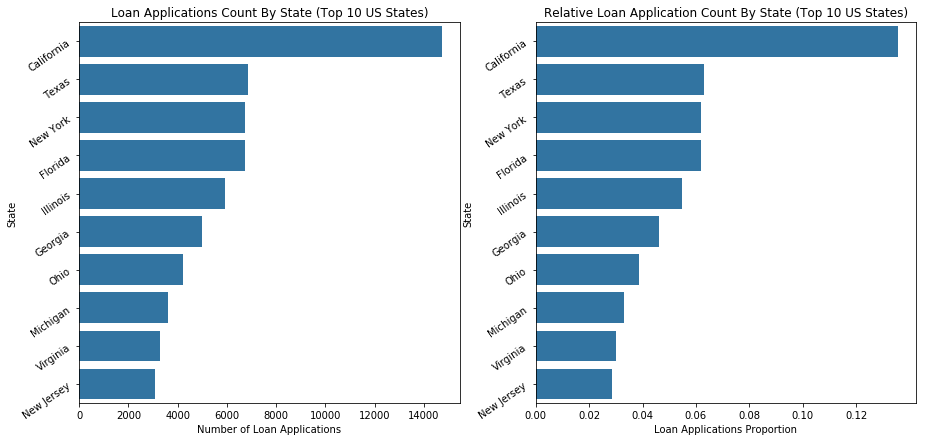

In [15]:
# Loan Distribution By State
base_color = sb.color_palette()[0]

plt.figure(figsize=(15,7))

#Sub Plot #1 - Absolute Loan Count by State.
plt.subplot(1, 2, 1)
state_order = df_filtered['State'].value_counts().index
sb.countplot(data=df_filtered, y='State', color=base_color, order=state_order[0:10]);
plt.xlabel('Number of Loan Applications');
plt.title('Loan Applications Count By State (Top 10 US States)')
plt.yticks(rotation=35)

#Sub Plot #2 - Relative Frequency of Loan By State.
plt.subplot(1, 2, 2)
n_points = df_filtered.shape[0]
max_count = df_filtered['State'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
sb.countplot(data = df_filtered, y = 'State', color = base_color, order=state_order[0:10]);
plt.xticks(tick_props * n_points, tick_names);
plt.xlabel('Loan Applications Proportion');
plt.title('Relative Loan Application Count By State (Top 10 US States)')
plt.yticks(rotation=35);

In the above plot, highest number of loan applications came from the state of **California**. About **13 percent** of loan applications came from California. Next State, **Texas has about 6 percent** of the loan application.

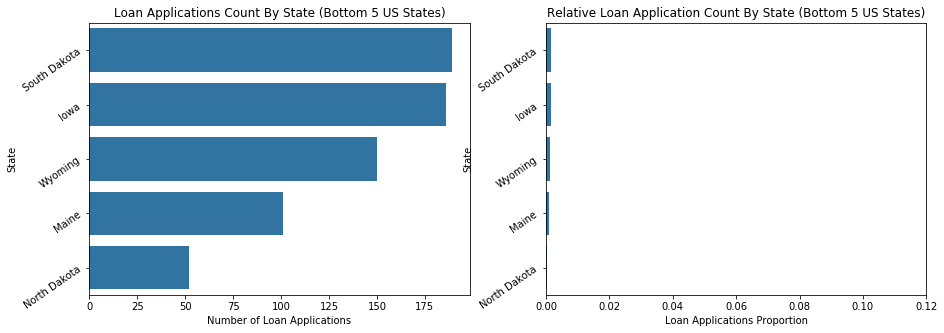

In [16]:
# Loan Distribution By State
plt.figure(figsize=(15,5))

#Sub Plot #1 - Absolute Loan Count by State.
plt.subplot(1, 2, 1)
state_order = df_filtered['State'].value_counts().index
sb.countplot(data=df_filtered, y='State', color=base_color, order=state_order[len(state_order) -5: len(state_order)]);
plt.xlabel('Number of Loan Applications');
plt.title('Loan Applications Count By State (Bottom 5 US States)')
plt.yticks(rotation=35)

#Sub Plot #2 - Relative Frequency of Loan By State.
plt.subplot(1, 2, 2)
n_points = df_filtered.shape[0]
max_count = df_filtered['State'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
sb.countplot(data = df_filtered, y = 'State', color = base_color, order=state_order[len(state_order) -5: len(state_order)]);
plt.xticks(tick_props * n_points, tick_names);
plt.xlabel('Loan Applications Proportion');
plt.title('Relative Loan Application Count By State (Bottom 5 US States)')
plt.yticks(rotation=35);

Above chart, show the data of the states which has lowest loan applications count. Least Number  of applications came the state of **North Dakota**, which had only **50 applications (less than 0.0005 percent of total application proportion )** from the year 2007 to 2014.

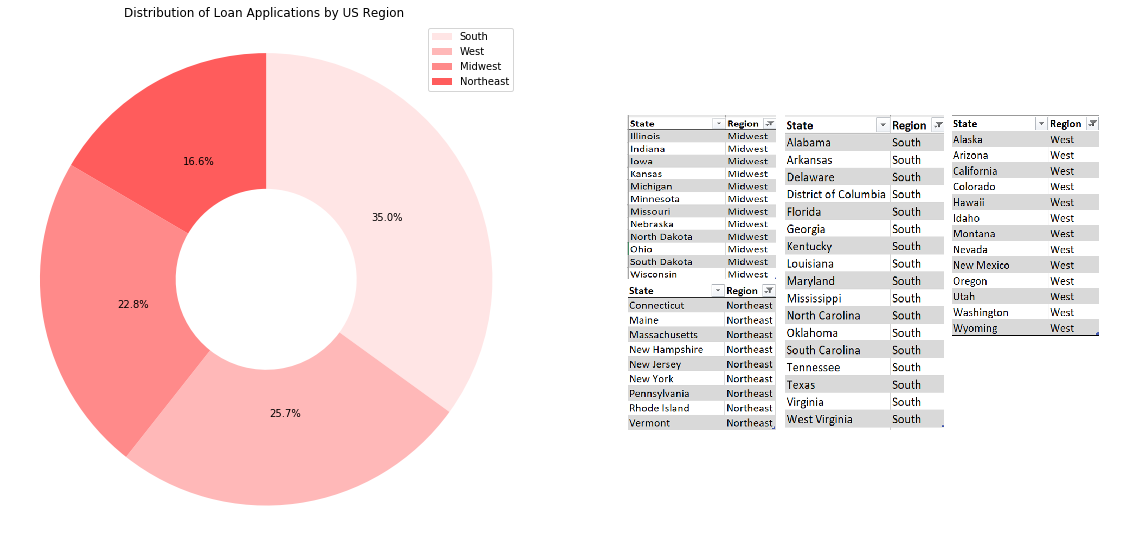

In [17]:
#Pie Chart for the distribution of loan counts by different US regions
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sorted_counts = df_filtered['Region'].value_counts();

patches= plt.pie(sorted_counts,  startangle = 90, autopct='%1.1f%%', counterclock = False, \
                 wedgeprops = {'width' : 0.6}, colors=sb.light_palette("red"));
plt.axis('square');
plt.title('Distribution of Loan Applications by US Region') 
plt.legend(patches[0], sorted_counts.index, loc="upper right");

plt.subplot(1, 2, 2)
img=mpimg.imread('States.PNG');
plt.imshow(img);
plt.axis('off');

From the above plot, more than **60 percent** of the loan activities are originating from South and West part of the US regions.

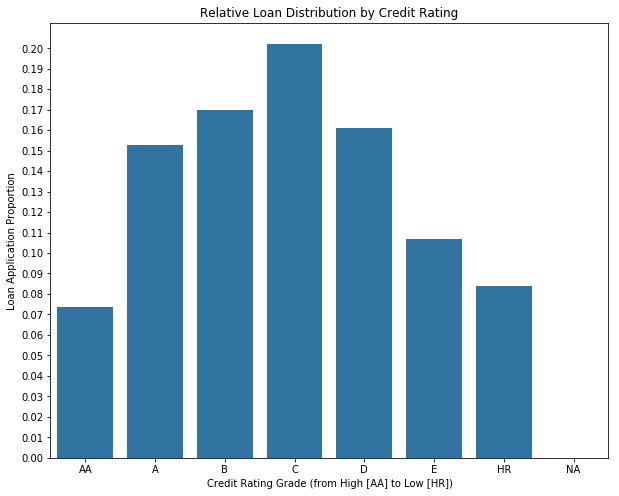

In [18]:
#Relative Frequency of the loan counts by Credit Rating.
n_points = df_filtered.shape[0]
max_count = df_filtered['CreditRating'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.01)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

#Ordinal Data Type. Hence we need to order from Good to Bad rating.
creditGradeIndex = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NA']

# create the plot
base_color = sb.color_palette()[0]
plt.figure(figsize=(10,8))
sb.countplot(data = df_filtered, x = 'CreditRating', color = base_color, order=creditGradeIndex);
plt.yticks(tick_props * n_points, tick_names);
plt.ylabel('Loan Application Proportion');
plt.xlabel('Credit Rating Grade (from High [AA] to Low [HR])');

plt.title('Relative Loan Distribution by Credit Rating');

Borrower's Credit Rating and their loan application follow a **NORMAL DISTRIBUTION** with highest loan applications are from borrower whose credit rating is **'C'**

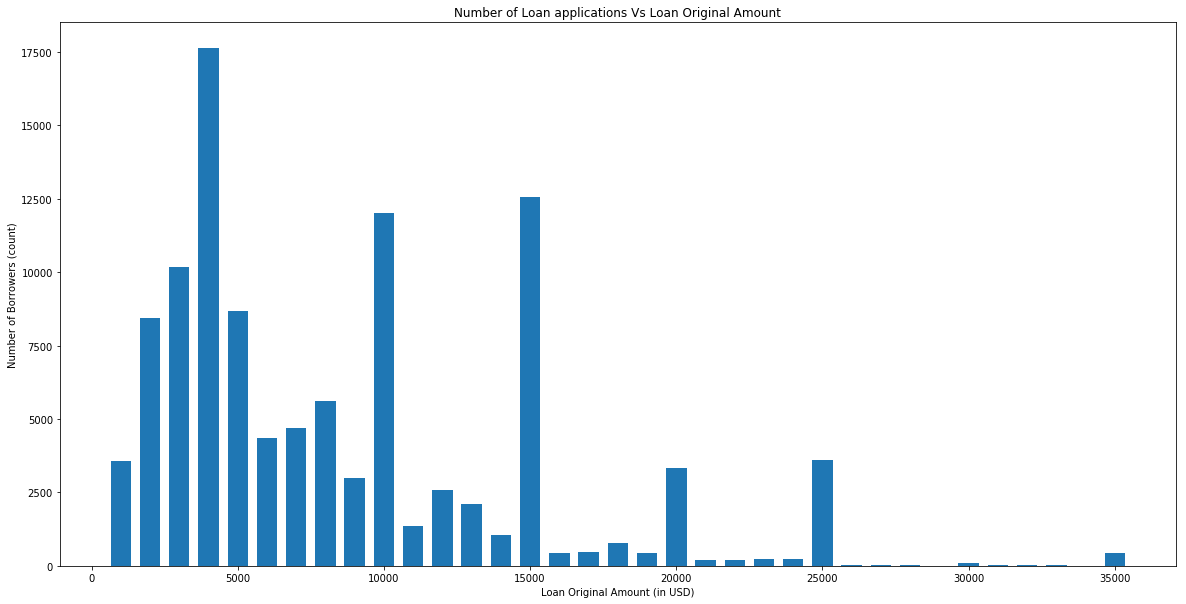

In [19]:
# Loan Amount Distribution..
plt.figure(figsize=(20,10))
bin_edges = np.arange(500, df_filtered['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data = df_filtered, x = 'LoanOriginalAmount', bins = bin_edges, rwidth = 0.7);
plt.xlabel('Loan Original Amount (in USD)')
plt.ylabel('Number of Borrowers (count)')
plt.title('Number of Loan applications Vs Loan Original Amount');

From the above plot, it seems the Loan Original Amount follows **MULTI-MODAL DISTRIBUTION**, with peaks of original loan amount at **3K-5K** USD, **10K** USD, **15K** USD, **20K** USD, **25K** USD. 

Above distrbution is highly skewed. Log scaling can be used to represent this data. This is shown in the below example.

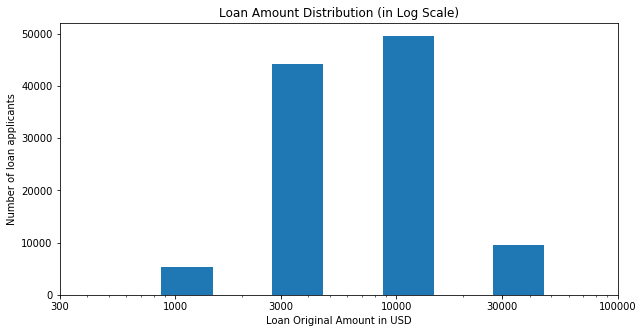

In [20]:
#Log Transformation
plt.figure(figsize=(10,5))
bin_edges = 10 ** np.arange(2.75, np.log10(df_filtered.LoanOriginalAmount.max())+0.5, 0.5)
hist_values = plt.hist(df_filtered.LoanOriginalAmount, bins = bin_edges, rwidth=0.5)
plt.xscale('log')
tick_locs = [300, 1000, 3000, 10000, 30000, 100000]
plt.xticks(tick_locs, tick_locs);
plt.xlabel('Loan Original Amount in USD');
plt.ylabel('Number of loan applicants');
plt.title('Loan Amount Distribution (in Log Scale)');

From the above chart, the distribution looks slightly right skewed with peaks at **2.5K-5K** USD, **9K-15K** USD.

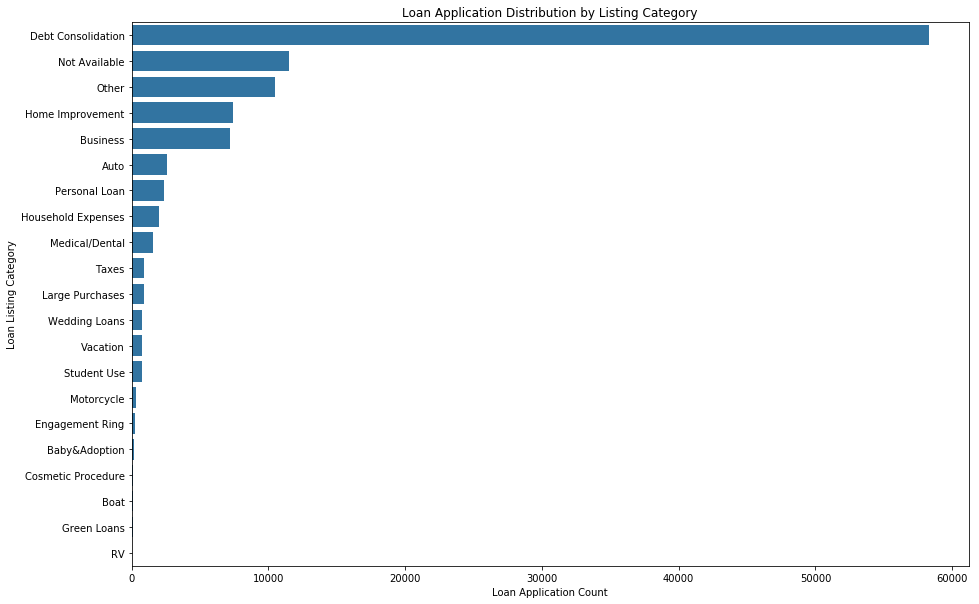

In [21]:
plt.figure(figsize=(15,10))
category_order = df_filtered['ListingCategoryDescription'].value_counts().index
sb.countplot(data=df_filtered, y='ListingCategoryDescription', color=base_color, order=category_order);
plt.xlabel('Loan Application Count');
plt.ylabel('Loan Listing Category');
plt.title('Loan Application Distribution by Listing Category');

'Debt Consolidation' is one of the main reason for the loan request, while recreational loans like 'RV', 'Boat' and green loans are at the lower end.

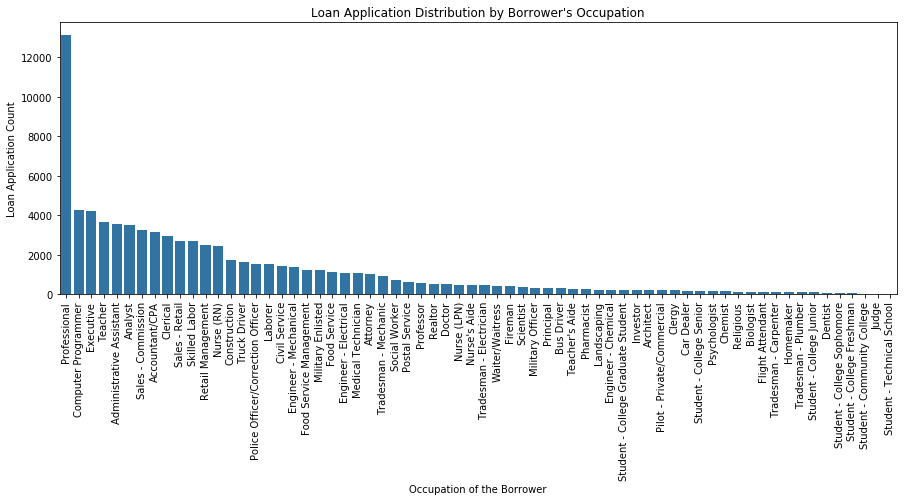

In [22]:
#Loan Distribution by Borrower's Occupation
plt.figure(figsize=(15,5))
ignore_occupation_list = ['Other', 'Not Available']
df_filtered_occupation =  df_filtered[~df_filtered.Occupation.isin(ignore_occupation_list)]
occupation_order = df_filtered_occupation['Occupation'].value_counts().index
sb.countplot(data=df_filtered_occupation, x='Occupation', color=base_color, order=occupation_order);
plt.xticks(rotation=90);
plt.ylabel('Loan Application Count');
plt.xlabel('Occupation of the Borrower');
plt.title('Loan Application Distribution by Borrower\'s Occupation');

From the above plot, it seems 'Professional' community tend to borrow a lot when compared to students and judges.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> -  Number of loan applications from the borrowers and the borrowers' rating follows normal distribution.
> - Loan Original Amount follows right-skewed distrbution with peaks at 2.5K-5K USD, 9K-15K USD.
> -  California has the highest loan activities and has about 13% of the total loan applications.
> - North Dakota has the least number of applications and has less than 0.0005% of the loan application.
> - 'Debt Consoldiation' seem to be the primary reason for the loan.
> - 'Professional' Occupation is the primary occupation among the borrowers.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> - Loan Original Amount follows **right-skewed distrbution** with peaks at 2.5K-5K USD, 9K-15K USD.
> - To get credit rating grade for most of the loan borrowers, we need to merge 'ProsperRatingAlpha' and 'CreditGrade' columns.
> - Removed un-necessary columns/data which are not needed for our analysis.
> - To get the State full name, additional data is used.

## Bivariate Exploration

Year  LoanAmount_In_Millions
2006               15.364212
2007               66.782198
2008               67.044997
2009                9.692013
2010               26.775582
2011               76.711783
2012              154.033169
2013              375.740433
2014              127.900565


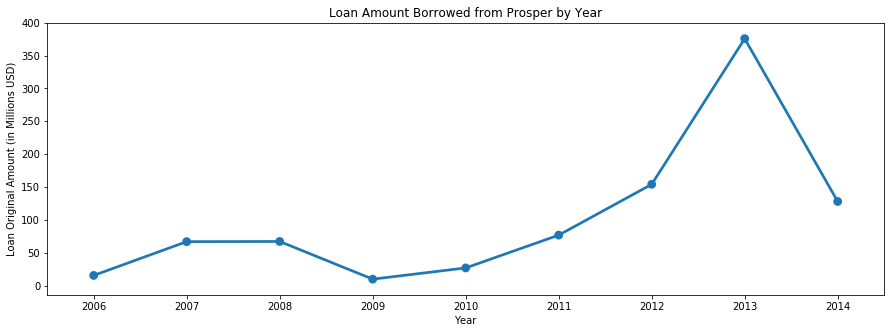

In [23]:
# Identify the relation between the year and loan original amount..

#get the loan original amount whose loan application is not cancelled.
df_loan_amt_year = df_filtered[df_filtered.NewLoanStatus != 'Cancelled'][[ 'ListingCreationDate', 'LoanOriginalAmount']]

#group loanamount by year.
df_loan_amt_year_gp = df_loan_amt_year.groupby(df_filtered.ListingCreationDate.dt.year)
df_loan_amt_year_gp = df_loan_amt_year_gp.sum()[['LoanOriginalAmount']].reset_index()

#Convert dollars to Millions.
df_loan_amt_year_gp.LoanOriginalAmount = df_loan_amt_year_gp.LoanOriginalAmount / 1000000
#Renaming columns for consistency
df_loan_amt_year_gp.rename(index=str, columns={'ListingCreationDate': 'Year', 'LoanOriginalAmount': 'LoanAmount_In_Millions'}, inplace=True);

#plotting the graph.
plt.figure(figsize=(15, 5))
sb.pointplot(data=df_loan_amt_year_gp, x= 'Year', y='LoanAmount_In_Millions', color=base_color);
plt.ylabel('Loan Original Amount (in Millions USD)')
plt.xlabel('Year');
plt.title('Loan Amount Borrowed from Prosper by Year');
print(df_loan_amt_year_gp.to_string(index=False));

From the year 2007 to 2008, borrowing increased by **0.3%**. But the during the **Great Recession period** (2008-2009), the borrowing dropped by **85 percent**. This could be the result of feared investors during the great recession period. Once the recession period ended (after the year 2009), the borrowing activity increased drammatically.

**IMPORTANT NOTE: There is a dip in the loan amount in the year 2014, this is because we have data only upto APRIL 2014**

C:\Users\Karthick\Anaconda3\envs\my_env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


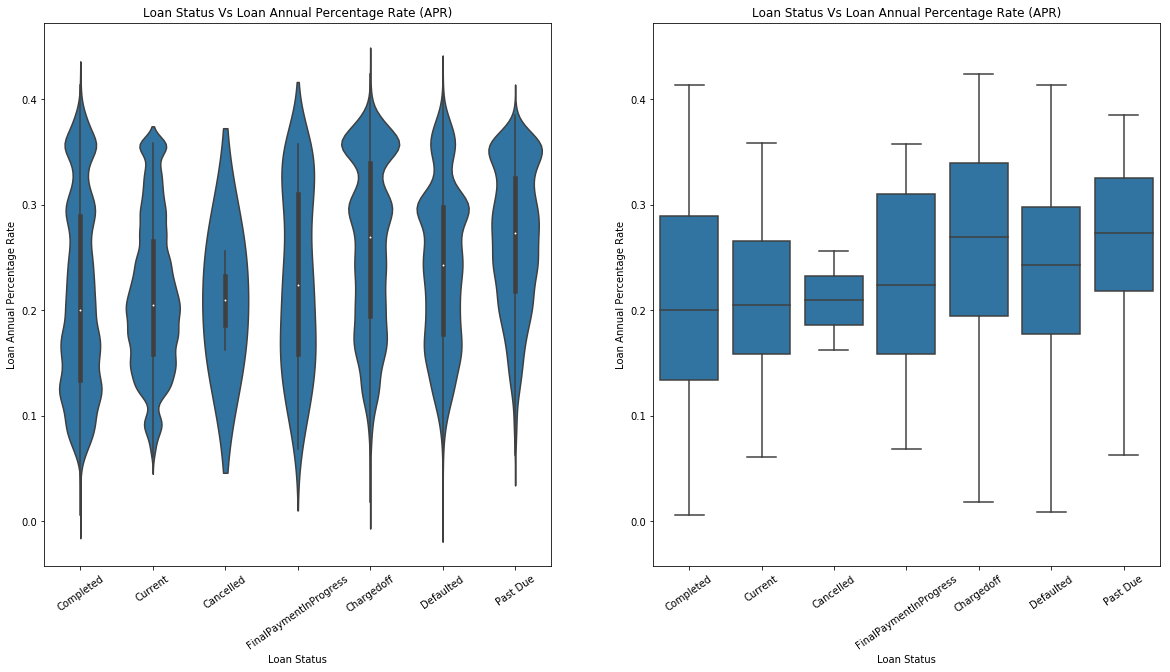

In [24]:
plt.figure(figsize = (20, 10))

plt_order = ['Completed', 'Current', 'Cancelled', 'FinalPaymentInProgress', 'Chargedoff', 'Defaulted', 'Past Due']

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df_filtered, x = 'NewLoanStatus', y = 'BorrowerAPR', color = base_color, order=plt_order)
plt.xticks(rotation=35)
plt.xlabel('Loan Status')
plt.ylabel('Loan Annual Percentage Rate')
plt.title('Loan Status Vs Loan Annual Percentage Rate (APR)')

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df_filtered, x = 'NewLoanStatus', y = 'BorrowerAPR', color = base_color, order=plt_order)
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot
plt.xticks(rotation=35);
plt.xlabel('Loan Status')
plt.ylabel('Loan Annual Percentage Rate')
plt.title('Loan Status Vs Loan Annual Percentage Rate (APR)');

All the loan which are in **GOOD STATE** (i.e. Loan Status like *Completed,Current,Cancelled,FinalPayInProgress* ) has mean annual percentage rate below **0.21** percent.

All the loan which are in **BAD STATE** (i.e. Loan Status like *ChargedOff,Defaulted,Past Due* ) has mean annual percentage rate above **0.21** percent.

It seems if the mean annual percentage rate is greater, its possible, they could go into **BAD STATE**.

C:\Users\Karthick\Anaconda3\envs\my_env\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Karthick\Anaconda3\envs\my_env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


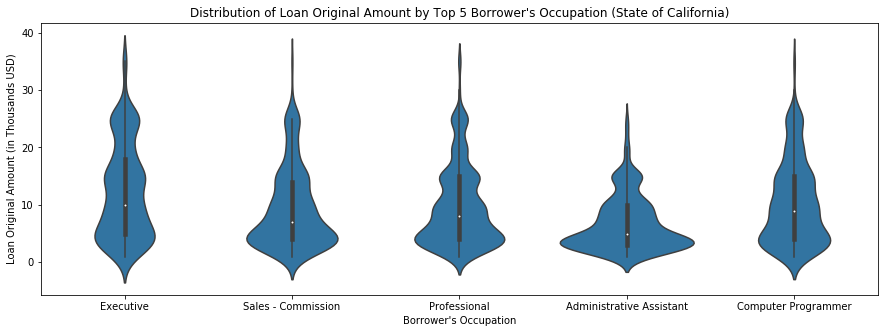

In [25]:

#Filter Loan from California which is not cancelled. And also filter 'Other' occupation category,
#as we dont have insight on this occuption type.
df_california_not_cancelled_loans = df_filtered[(df_filtered.State == 'California') \
                                                & (df_filtered.NewLoanStatus != 'Cancelled') \
                                                & (df_filtered.Occupation != 'Other') ]
#Get the top 5 applicant's occupation.
top_5_applicants_occupation = df_california_not_cancelled_loans.Occupation.value_counts()[0:5].index
df_california_top_5_app_occup_details = df_california_not_cancelled_loans[\
                                        df_california_not_cancelled_loans.Occupation.isin(top_5_applicants_occupation)]


plt.figure(figsize=(15,5))
df_california_top_5_app_occup_details['LoanOriginalAmountInThousands'] = df_california_top_5_app_occup_details.LoanOriginalAmount / 1000;
sb.violinplot(data = df_california_top_5_app_occup_details, x = 'Occupation', y = 'LoanOriginalAmountInThousands', \
              color = base_color);
plt.xlabel('Borrower\'s Occupation');
plt.ylabel('Loan Original Amount (in Thousands USD)');
plt.title('Distribution of Loan Original Amount by Top 5 Borrower\'s Occupation (State of California)');

Above chart shows, for the state of California, top five borrower's occupations are Executive, Sales, Professional, Administrative Assistant, and Programmer.

Executive tends to borrower higher loan amount when compared to other professions. This could because, they might be earning more money compared to others.

C:\Users\Karthick\Anaconda3\envs\my_env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


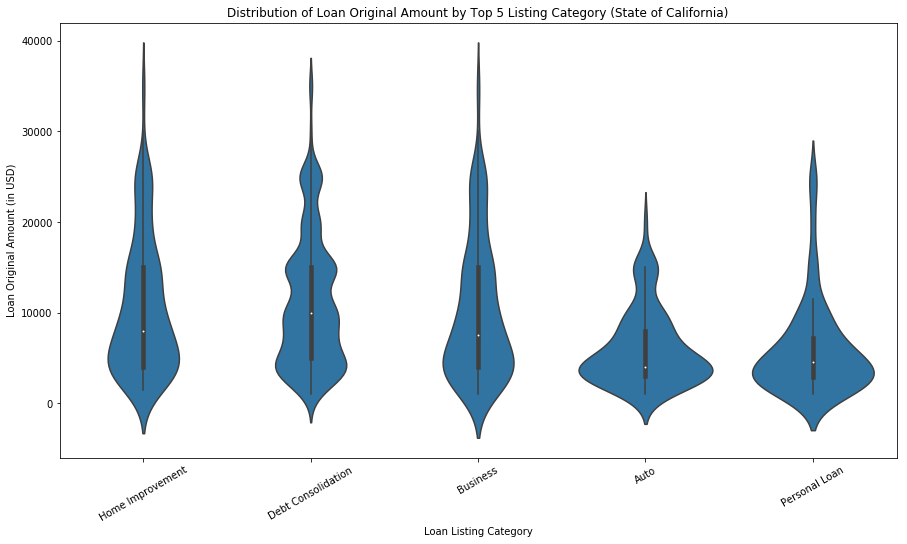

In [26]:
#Ignore the listing category with fewer details.
ignore_listing_category_list = ['Not Available', 'Other']
df_california_top_5_app_occup_details_filtered = df_california_top_5_app_occup_details[~df_california_top_5_app_occup_details. \
                                      ListingCategoryDescription.isin(ignore_listing_category_list)]
#Identifying top 5 borrowing category
top_5_spending_category = df_california_top_5_app_occup_details_filtered.ListingCategoryDescription.value_counts()[0:5].index
top_5_borrowing_details = df_california_top_5_app_occup_details_filtered[ \
                df_california_top_5_app_occup_details_filtered.ListingCategoryDescription.isin(top_5_spending_category)]

plt.figure(figsize=(15,8))
sb.violinplot(data = top_5_borrowing_details, x = 'ListingCategoryDescription', y = 'LoanOriginalAmount', color = base_color)
plt.xticks(rotation=30);
plt.xlabel('Loan Listing Category');
plt.ylabel('Loan Original Amount (in USD)');
plt.title('Distribution of Loan Original Amount by Top 5 Listing Category (State of California)');

Above chart shows, for the state of California, top five loan reasons are for: 'Home Improvement', 'Debt Consolidation', 'Business', 'Auto', 'Personal Loan'.

Loan Amounts borrowed for **'Home Improvement', Debt Consolidation', 'Business'** are higher than 'Auto', 'Personal Loan', as the higher amount distribution for 'Auto' and 'Personal Loan' are very few.

Number of Loan applications with lower loan amount is for 'Auto', 'Personal Loan' reasons.

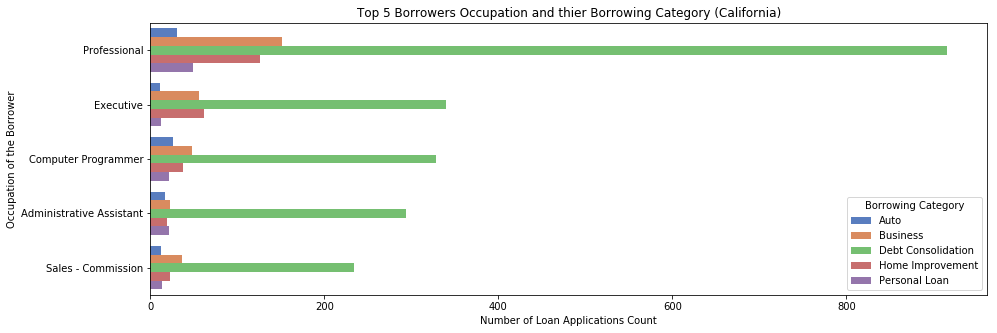

In [27]:
#Sample for Qualitative Vs Qualitative variable analysis.
df_california_top_5_app_occup_details_filtered_gp = top_5_borrowing_details[ \
                                    ['ListingKey', 'Occupation', 'ListingCategoryDescription']] \
                                    .groupby(['Occupation', 'ListingCategoryDescription']).count().reset_index()
df_california_top_5_app_occup_details_filtered_gp.rename(index=str, columns={'ListingKey': 'Count'}, inplace=True)

plt.figure(figsize=(15,5))
sb.barplot(y="Occupation", x="Count", hue="ListingCategoryDescription", data=df_california_top_5_app_occup_details_filtered_gp,
                  palette="muted", order=top_5_applicants_occupation);
plt.legend(title='Borrowing Category')

plt.xlabel('Number of Loan Applications Count')
plt.ylabel('Occupation of the Borrower')
plt.title('Top 5 Borrower''s Occupation and thier Borrowing Category (California)');

Above plot shows, for the state of California, Top Borrower's occupation and their reason for getting the loan.

All the top borrower has one main big reason i.e. **'Debt Consolidation'** for borrowing money. 

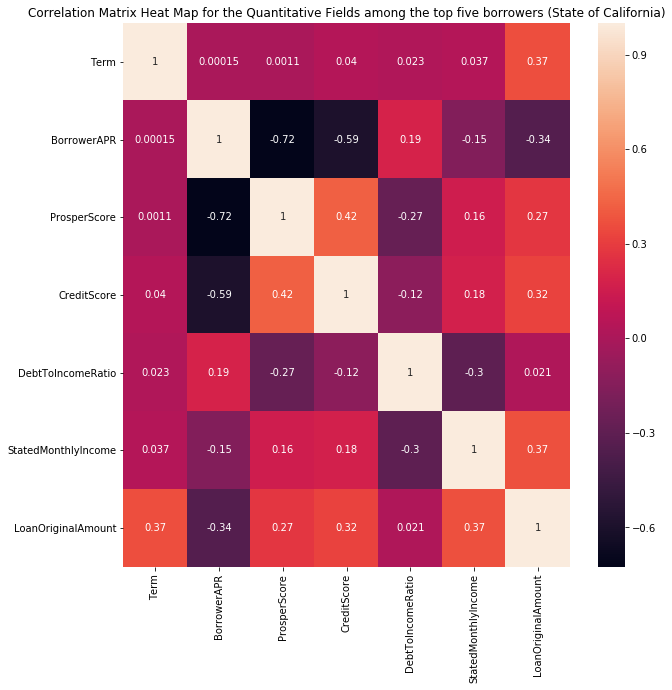

In [28]:
#Sample for Quantitative vs Quantitative Analysis.

plt.figure(figsize=(10,10))
sb.heatmap(top_5_borrowing_details[['ListingKey', 'ListingCreationDate', 'Term', 'LoanStatus', \
       'BorrowerAPR', 'ProsperScore', 'BorrowerState', 'Occupation', \
       'CreditScore', 'DebtToIncomeRatio', 'StatedMonthlyIncome', \
       'LoanOriginalAmount', 'State', 'Region', 'ListingCategoryDescription', \
       'NewLoanStatus', 'CreditRating']].corr(), annot=True);
plt.title('Correlation Matrix Heat Map for the Quantitative Fields among the top five borrowers (State of California)');

From the above plot, for the state of California, correlation between different fields in Loan Dataset can be identified.

- There is **strong negative** relationship between Prosper Score and APR of the loan. This makes sense, as borrower's poor credit rating results in high APR for the loan.
- There is **strong negative** relationship between Credit Score and APR of the loan. This also makes sense, as borrower's  credit score results in high APR for the loan. 
- Also other relations show weaker signs. For instance, there is a weak relationship between the APR of the loan and loan original amount.

C:\Users\Karthick\Anaconda3\envs\my_env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


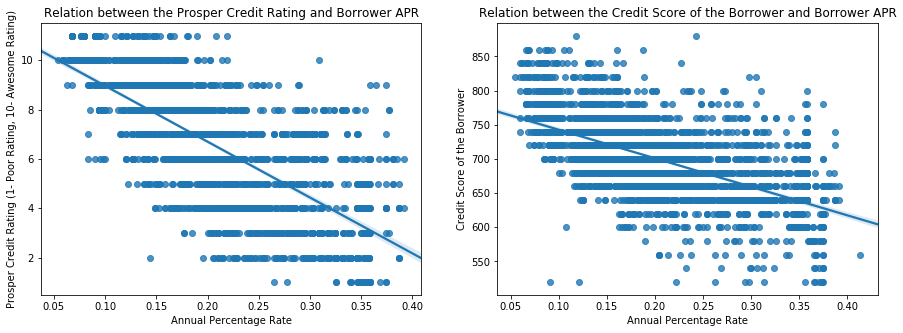

In [29]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sb.regplot(x='BorrowerAPR', y='ProsperScore', data=top_5_borrowing_details);
plt.xlabel('Annual Percentage Rate')
plt.ylabel('Prosper Credit Rating (1- Poor Rating, 10- Awesome Rating)')
plt.title('Relation between the Prosper Credit Rating and Borrower APR')

plt.subplot(1, 2, 2)
sb.regplot(x='BorrowerAPR', y='CreditScore', data=top_5_borrowing_details);
plt.xlabel('Annual Percentage Rate')
plt.ylabel('Credit Score of the Borrower')
plt.title('Relation between the Credit Score of the Borrower and Borrower APR');


Above plot confirms the strong negative relations between APR and Prosper Credit Rating, APR and Credit Score.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

***Below Reasons are applicable to the State of California (only California state is included in the analyses).***

> - There are strong negative relationships between APR of the loan and CreditScore. Also strong negative score between APR of the loan and Prosper Credit Rating. 
> - Professional Community tend to apply more loans.
> - Debt Consolidation is one of the top reasons for getting the loan.
> - Loan Amounts borrowed for **'Home Improvement', Debt Consolidation', 'Business'** are higher than **'Auto', 'Personal Loan'**, as the higher amount distribution for 'Auto' and 'Personal Loan' are very few.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> - Weaker Relationship between loan amount and Annual Percentage Rate of the loan.
> - Weaker Relationship between loan amount and 'Debt/Income Ratio'

## Multivariate Exploration

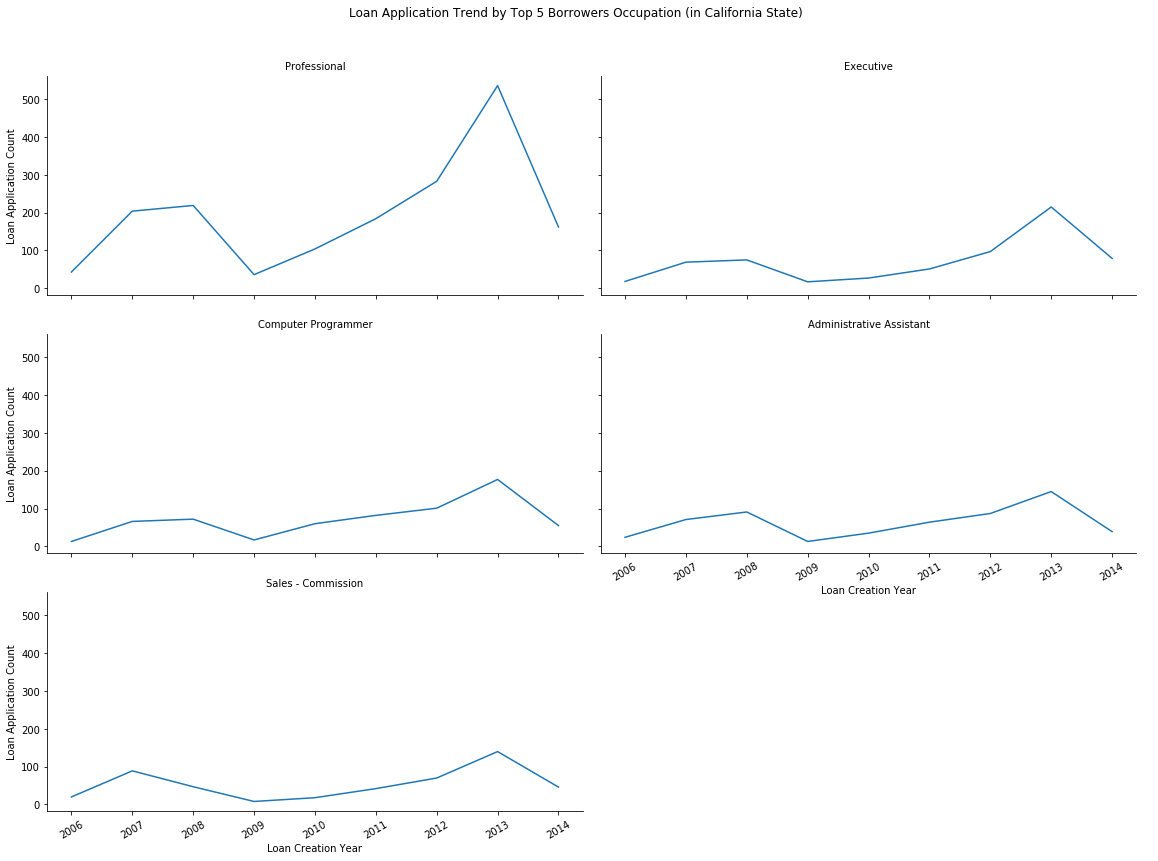

In [30]:
# Loan Origination Year vs Loan Application Count vs Occupation (Top 5)
df_california_top_5_app_occup_details_filtered = df_california_top_5_app_occup_details[['ListingKey', \
                                                                                        'ListingCreationDate', 'Occupation']]
df_loan_year_occupation_gp = df_california_top_5_app_occup_details_filtered.groupby(
                                [df_california_top_5_app_occup_details_filtered.ListingCreationDate.dt.year, 'Occupation'])
df_loan_year_occupation_gp = df_loan_year_occupation_gp.count()['ListingKey'].reset_index()
df_loan_year_occupation_gp.rename(index=str, columns={'ListingKey': 'LoanApplicationCount'}, inplace=True)
col_order = ['Professional', 'Executive', 'Computer Programmer', 'Administrative Assistant', 'Sales - Commission']
g = sb.FacetGrid(data = df_loan_year_occupation_gp, col = 'Occupation' , \
                             col_wrap=2, aspect=2, height=4, col_order=col_order)
g.map(sb.lineplot, 'ListingCreationDate', 'LoanApplicationCount' ).add_legend()
g.set_titles('{col_name}')
g.set_xticklabels(rotation=30);
g.set_xlabels(label='Loan Creation Year');
g.set_ylabels(label='Loan Application Count');
plt.subplots_adjust(top=0.9); # Adjustment for the title.
g.fig.suptitle('Loan Application Trend by Top 5 Borrowers Occupation (in California State)');

Executives, Sales Personnels, Admin. Assistants, and Computer Programmer tend to follow the same trend. ie. the number of loan application counts over the period from 2006 to 2014 are similar. But Professionals' application count expontentially increased.

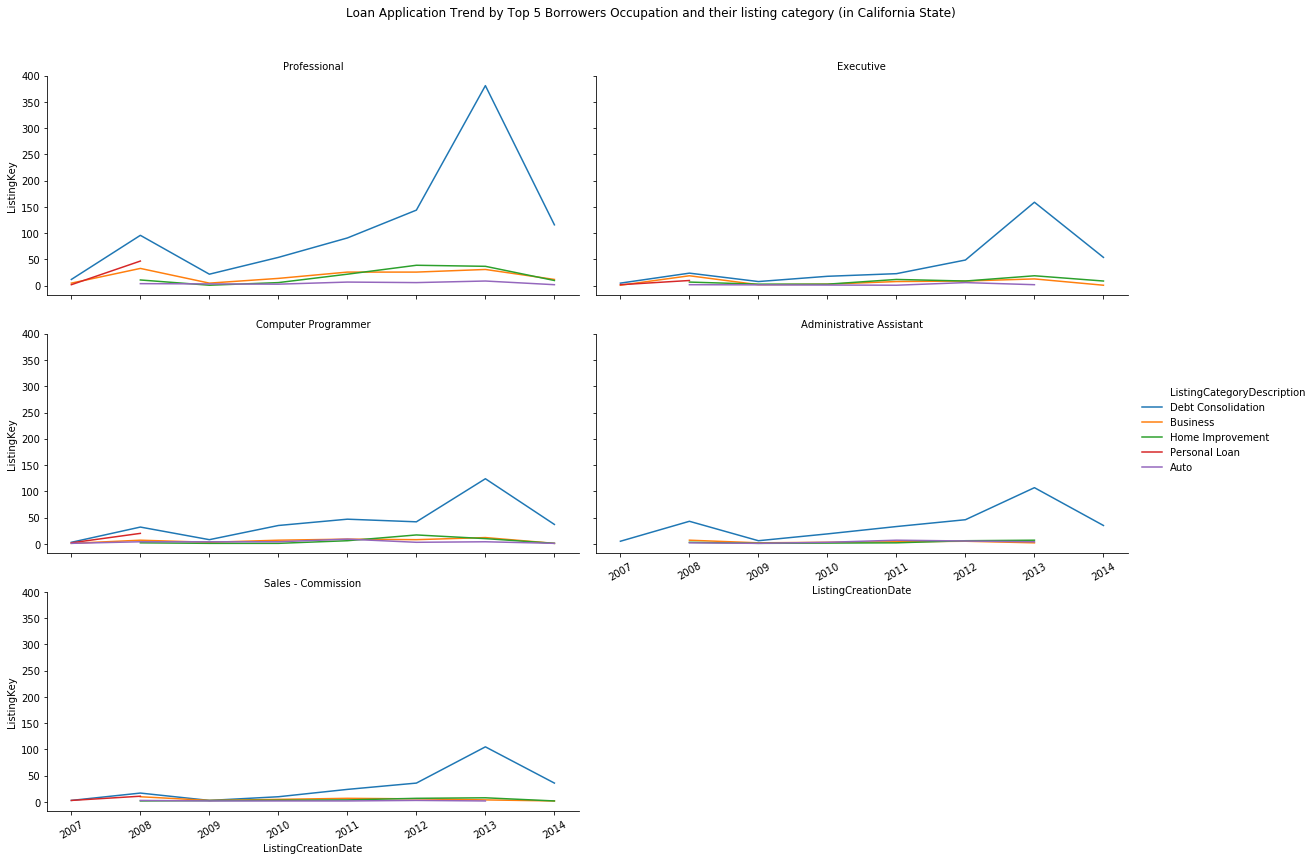

In [31]:
# Loan Origination Year vs Loan Application Count vs Occupation (Top 5) vs Loan Listing Category (Top 5),
df_california_top_5_app_occup_details_filtered = top_5_borrowing_details[['ListingKey', 'ListingCreationDate', \
                                                                                        'Occupation', 'ListingCategoryDescription']]

df_california_top_5_app_occup_details_filtered_gp = df_california_top_5_app_occup_details_filtered.groupby([ \
                                            df_california_top_5_app_occup_details_filtered.ListingCreationDate.dt.year, \
                                            'Occupation', 'ListingCategoryDescription'])


df_california_top_5_app_occup_details_filtered_gp = df_california_top_5_app_occup_details_filtered_gp.count() \
                                                    ['ListingKey'].reset_index()
g = sb.FacetGrid(data = df_california_top_5_app_occup_details_filtered_gp, col = 'Occupation', \
                 col_wrap=2, aspect=2, height=4, col_order=col_order)
g.map(sb.lineplot, 'ListingCreationDate', 'ListingKey', 'ListingCategoryDescription', hue_order=top_5_spending_category  ).add_legend()
g.set_titles('{col_name}')
g.set_xticklabels(rotation=30);
plt.subplots_adjust(top=0.9); # Adjustment for the title.
g.fig.suptitle('Loan Application Trend by Top 5 Borrowers Occupation and their listing category (in California State)');

Similar to previous plot, the trends among Executives, Admin. assistants, Programmers and Sales personnels are similar. Also, Debt Consolidation is primary reason for all the loan request. Professionals' lead the 'Debt Consolidation' category.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> - Among the top five borrowers, Executives, Programmers, Sales Personnels and Admin. Assitants follow similar trend. But Professional loan requesting trend have increased drammatically over the period (from 2006 to 2014).

### Were there any interesting or surprising interactions between features?

> - Debt Consolidation is the primary reason for the loan. Borrowing money to take care of other loans by the borrowers seem to be trend. 